In [1]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

ac = AgglomerativeClustering(n_clusters = 8, affinity="euclidean", linkage="average")
X, y = make_blobs(n_samples=1000, centers=8, n_features=2, random_state=800)

In [2]:
distances = linkage(X, method="centroid", metric="euclidean")
sklearn_clusters = ac.fit_predict(X)
scipy_clusters = fcluster(distances, 3, criterion="distance")

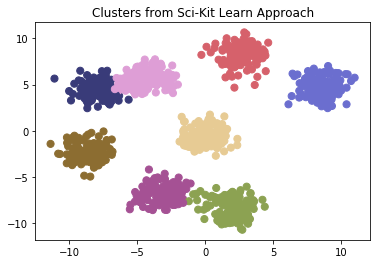

In [3]:
plt.figure(figsize=(6,4))
plt.title("Clusters from Sci-Kit Learn Approach")
plt.scatter(X[:, 0], X[:, 1], c = sklearn_clusters ,s=50, cmap='tab20b')
plt.show()

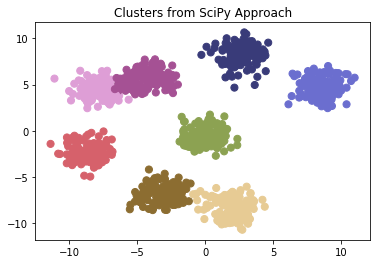

In [4]:
plt.figure(figsize=(6,4))
plt.title("Clusters from SciPy Approach")
plt.scatter(X[:, 0], X[:, 1], c = scipy_clusters ,s=50, cmap='tab20b')
plt.show()

In [5]:
#  Unit Test

In [6]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import unittest
class TestAgglomerativeClustering(unittest.TestCase):   
    X2, y2 = make_blobs(n_samples=1000, centers=8, n_features=2, random_state=800)
    
    def test_X_y(self):
        self.assertEqual(len(self.X2),len(X))
        self.assertEqual(len(self.y2),len(y))
        
    def test_ac(self):
        ac2 = AgglomerativeClustering(n_clusters = 8, affinity="euclidean", linkage="average")
        self.assertMultiLineEqual(str(ac2),str(ac))
        
    def test_distances(self):
        distances2 = linkage(self.X2, method="centroid", metric="euclidean")
        self.assertEqual(len(distances2),len(distances))
        
    def test_sklearn_clusters(self):
        ac3 = AgglomerativeClustering(n_clusters = 8, affinity="euclidean", linkage="average")
        sklearn_clusters2 = ac3.fit_predict(self.X2)
        self.assertEqual(len(sklearn_clusters2),len(sklearn_clusters))
        
        
    def test_scipy_clusters(self):
        distances12 = linkage(self.X2, method="centroid", metric="euclidean")
        scipy_clusters2 = fcluster(distances12, 3, criterion="distance")
        self.assertEqual(len(scipy_clusters2),len(scipy_clusters2))
        
        

In [7]:
suite = unittest.TestLoader().loadTestsFromTestCase(TestAgglomerativeClustering)
unittest.TextTestRunner(verbosity=2).run(suite)

test_X_y (__main__.TestAgglomerativeClustering) ... ok
test_ac (__main__.TestAgglomerativeClustering) ... ok
test_distances (__main__.TestAgglomerativeClustering) ... ok
test_scipy_clusters (__main__.TestAgglomerativeClustering) ... ok
test_sklearn_clusters (__main__.TestAgglomerativeClustering) ... ok

----------------------------------------------------------------------
Ran 5 tests in 0.163s

OK


<unittest.runner.TextTestResult run=5 errors=0 failures=0>